# Problem Statement
Develop a predictive model to identify and anticipate customer churn by leveraging available data

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Importing Data

In [2]:
CreditData = pd.read_csv('credit.csv')
CreditData

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      712672083  Existing Customer            65      F                0   
1      713049933  Existing Customer            47      F                1   
2      713049933  Existing Customer            48      F                1   
3      713135883  Existing Customer            65      F                0   
4      713135883  Existing Customer            64      F                0   
...          ...                ...           ...    ...              ...   
20066  900203139  Existing Customer            24      F                0   
20067  900203141  Existing Customer            24      F                1   
20068  900203144  Existing Customer            24      M                2   
20069  900203145  Existing Customer            24      M                0   
20070  900203146  Existing Customer            24      M                1   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married  Less than $40K          Blue   
1            Graduate        Married     $40K - $60K        Silver   
2            Graduate        Married     $40K - $60K        Silver   
3             College        Married  Less than $40K          Blue   
4             College        Married  Less than $40K          Blue   
...               ...            ...             ...           ...   
20066         College         Single  Less than $40K        Silver   
20067         College       Divorced  Less than $40K        Silver   
20068         College        Married     $60K - $80K          Blue   
20069         College         Single     $40K - $60K          Blue   
20070         College         Single  Less than $40K          Blue   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  36  ...                       3                      2   
1                  36  ...                       2                      2   
2                  48  ...                       6                      2   
3                  65  ...                       5                      0   
4                  53  ...                       3                      0   
...               ...  ...                     ...                    ...   
20066              41  ...                       0                      3   
20067              33  ...                       3                      4   
20068              42  ...                       4                      2   
20069              38  ...                       0                      3   
20070              16  ...                       6                      5   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0            1438.3                  747            691.3              24   
1            5756.0                    0           5756.0              44   
2            5756.0                  990           5756.0              25   
3            4315.0                  393           3598.0              73   
4            4315.0                  717           3598.0              51   
...             ...                  ...              ...             ...   
20066        5061.0                  547          12833.0             109   
20067        5061.0                 1074           5061.0              73   
20068        4109.0                 1397           4109.0             119   
20069        4246.0                 1418           1729.0             103   
20070        4000.0                  707          12359.0             118   

       Avg_Utilization_Ratio  Quarter  Year  Date_Leave  
0                      0.519     none  2018   none,2018  
1                      0.000     none  2018   none,2018  
2                      0.170     none  2019   none,2019  
3                      0.090     none  2019   none,2019  
4                      0.166     none  2018   none,2018  
...                      ...      ...   ...

# Data Description
Description of the dataset as follows.

> **CLIENTNUM** : Client number (Unique identifier for the customer holding the account)  
> **Attrition_Flag** : Indicates whether the customer has churned or is an existing customer (Existing or Attrited)  
> **Customer_Age** : Customer’s Age in Years  
> **Gender** : Gender of customer (Male or Female)   
> **Dependent_count** : Number of individuals who rely on the customer for financial support (typically part of the customer's household)  
> **Education_Level** :  Highest level of education attained by customer  
> **Marital_Status** : Marital status of the customer (Married, Single or Divorced)  
> **Income_Category** : Annual Income Category of the account holder  
> **Card_Category** : Type of Card held by customer (Blue, Silver, Gold, Platinum)   
> **Months_on_book** : Number of months associated with bank  
> **Total_Relationship_Count** :  Total no. of products/services customer has with bank  
> **Months_Inactive_12_mon** : No. of months inactive in the last 12 months  
> **Contacts_Count_12_mon** : No. of interactions with customer in the last 12 months  
> **Credit_Limit** : Credit Limit on the Credit Card  
> **Total_Revolving_Bal** : Total Revolving Balance on the Credit Card (unpaid balance)  
> **Avg_Open_To_Buy** : Average amount available to spend on the credit card   
> **Total_Trans_Ct** : Total Transaction Count (Last 12 months)  
> **Avg_Utilization_Ratio** : Average percentage of customer's credit limit that they typically use  
> **Quarter** : Quarter of the year when the data was recorded  
> **Year** : Year when the data was recorded  
> **Date_Leave** : Date when the customer left (if applicable)  

# CLEANING and PREPROCESSING

In [3]:
#Dropping irrelevant data
CreditData = CreditData.drop(['CLIENTNUM','Quarter','Year','Date_Leave'], axis = 1)

In [4]:
# Check for missing values
missing_values = CreditData.isna().sum()
print(missing_values)

# Check for duplicate rows
duplicate_rows = CreditData.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64
Number of duplicate rows: 0


In [5]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            20071 non-null  object 
 1   Customer_Age              20071 non-null  int64  
 2   Gender                    20071 non-null  object 
 3   Dependent_count           20071 non-null  int64  
 4   Education_Level           20071 non-null  object 
 5   Marital_Status            20071 non-null  object 
 6   Income_Category           20071 non-null  object 
 7   Card_Category             20071 non-null  object 
 8   Months_on_book            20071 non-null  int64  
 9   Total_Relationship_Count  20071 non-null  int64  
 10  Months_Inactive_12_mon    20071 non-null  int64  
 11  Contacts_Count_12_mon     20071 non-null  int64  
 12  Credit_Limit              20071 non-null  float64
 13  Total_Revolving_Bal       20071 non-null  int64  
 14  Avg_Op

## Splitting dataset into Numerical feature, divided by 2 subsets: Discrete and Continuous, and Categorical feature

Numerical Features: Variables that represent measurable quantities and can take on numerical values.

Discrete Features: Numerical Features that represent distinct, separate values with clear boundaries.

Continuous Features: Numerical features that represent measurements that can take on any real number within a specified range.

Categorical Features: Non-numeric and represent distinct categories or labels.

# Based on observations

### Numeric (Discrete) Variables: 
1) Dependent_count  
2) Months_on_book  
3) Total_Relationship_Count  
4) Months_Inactive_12_mon  
5) Contacts_Count_12_mon  
6) Total_Trans_Ct   

### Numeric (Continuous) Variables: 
1) Customer_Age    
2) Credit_Limit  
3) Total_Revolving_Bal   
4) Avg_Open_To_Buy  
5) Avg_Utilization_Ratio    
  
### Categorical Variables:
1) Attrition_Flag  
2) Gender  
3) Education_Level   
4) Marital_Status  
5) Income_Category  
6) Card_Category  

# ANALYSIS OF CONTINUOUS AND DISCRETE FEATURES

In [6]:
#Extracting Numeric Variables
CreditNumData = CreditData.select_dtypes(include = [np.int64, np.float64])

In [7]:
CreditNumData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              20071 non-null  int64  
 1   Dependent_count           20071 non-null  int64  
 2   Months_on_book            20071 non-null  int64  
 3   Total_Relationship_Count  20071 non-null  int64  
 4   Months_Inactive_12_mon    20071 non-null  int64  
 5   Contacts_Count_12_mon     20071 non-null  int64  
 6   Credit_Limit              20071 non-null  float64
 7   Total_Revolving_Bal       20071 non-null  int64  
 8   Avg_Open_To_Buy           20071 non-null  float64
 9   Total_Trans_Ct            20071 non-null  int64  
 10  Avg_Utilization_Ratio     20071 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.7 MB


In [8]:
CreditNumData.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  20071.000000     20071.000000    20071.000000   
mean      46.331872         1.954810       41.039510   
std        8.385922         1.201685       10.392045   
min       24.000000         0.000000       13.000000   
25%       41.000000         1.000000       35.000000   
50%       47.000000         2.000000       41.000000   
75%       52.000000         3.000000       48.000000   
max       65.000000         5.000000       68.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              20071.000000            20071.000000   
mean                   3.816701                2.665388   
std                    1.553507                1.612679   
min                    1.000000                0.000000   
25%                    3.000000                1.000000   
50%                    4.000000                3.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           20071.000000  20071.000000         20071.000000   
mean                2.449106   8637.125759          1011.000399   
std                 1.104183   9084.355769           658.145373   
min                 0.000000   1400.000000             0.000000   
25%                 2.000000   2548.500000           521.000000   
50%                 2.000000   4532.000000          1002.000000   
75%                 3.000000  11062.000000          1418.500000   
max                 6.000000  35000.000000         12080.000000   

       Avg_Open_To_Buy  Total_Trans_Ct  Avg_Utilization_Ratio  
count     20071.000000    20071.000000           20071.000000  
mean       7480.056754       67.817797               0.244055  
std        9103.256947       26.786190               0.234877  
min           3.000000       10.000000               0.000000  
25%        1312.500000       45.000000               0.050000  
50%        3474.000000       69.000000               0.160000  
75%        9904.000000       86.000000               0.390000  
max       34516.000000      139.000000               0.999000

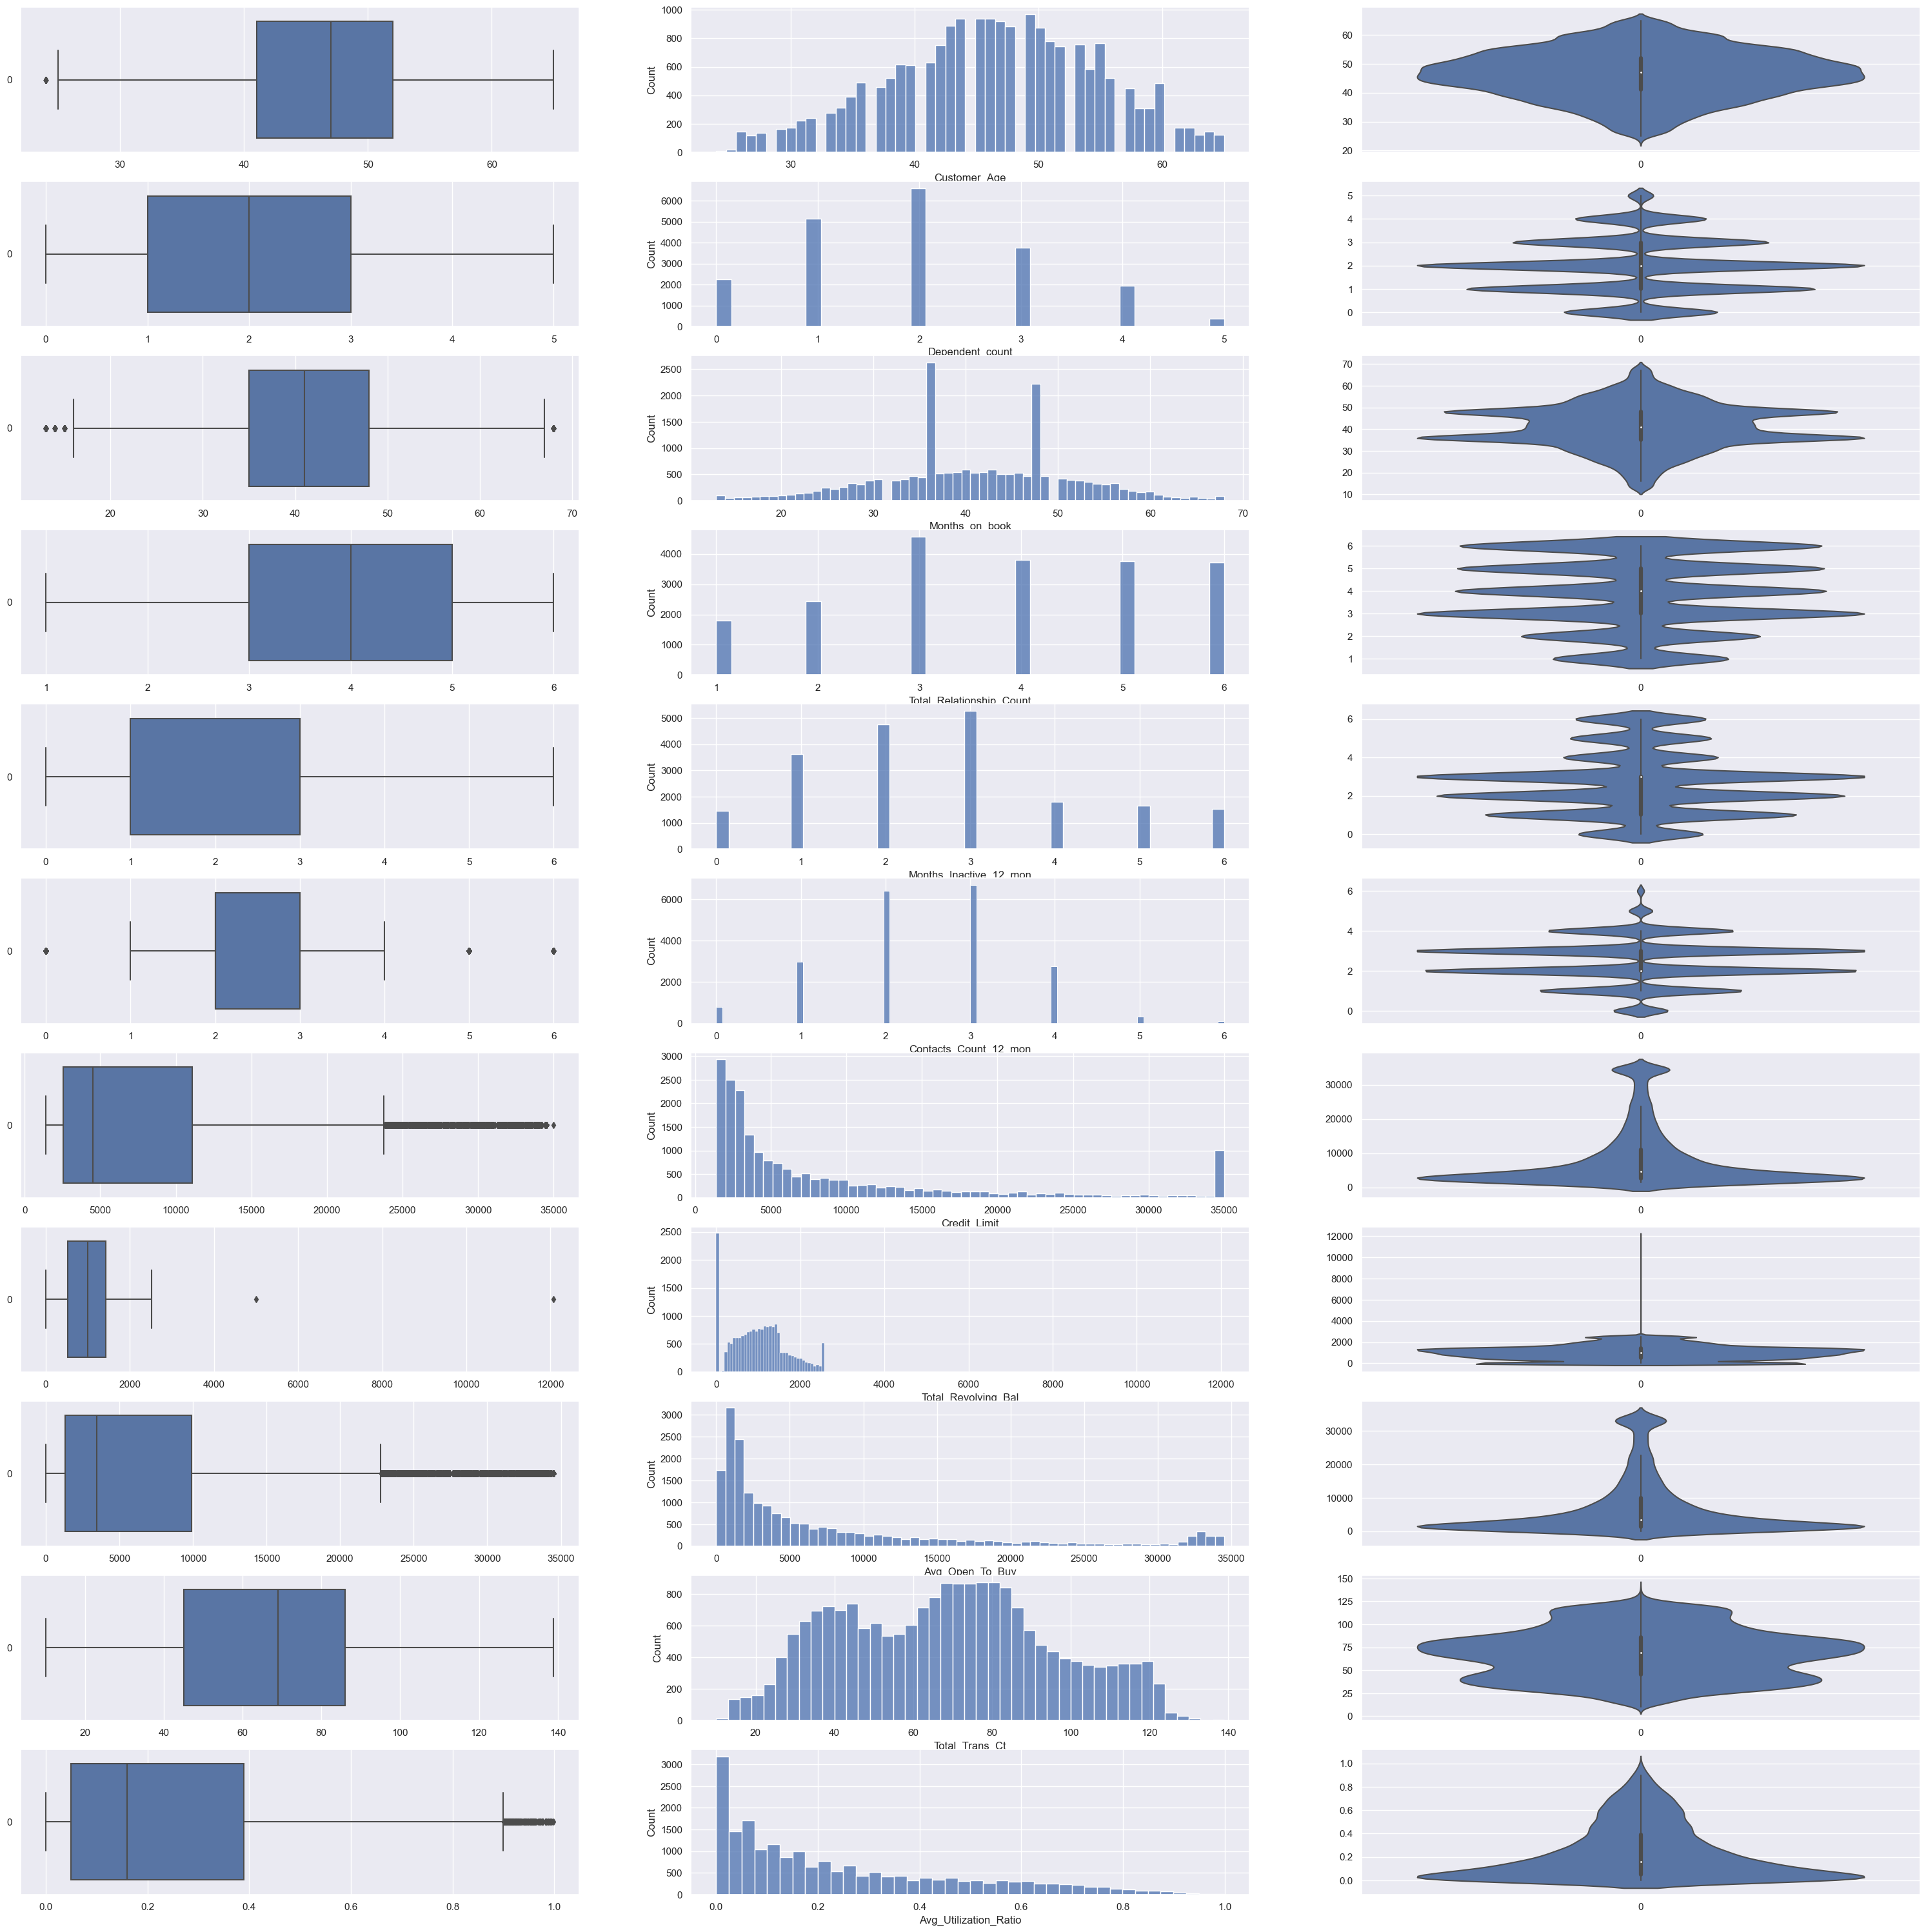

In [9]:
# Draw the distributions of all variables
f, axes = plt.subplots(11, 3, figsize=(38, 38))

count = 0
for var in CreditNumData:
    sb.boxplot(data = CreditNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = CreditNumData[var], ax = axes[count,1])
    sb.violinplot(data = CreditNumData[var], ax = axes[count,2])
    count += 1

# ANALYSIS OF CATEGORICAL FEATURES

In [10]:
#Extracting Categorical Variables 
CreditCatData = CreditData.select_dtypes(include=['object'])

# Iterate over the columns in CreditCatData and convert them to 'category' data type
for column in CreditCatData.columns:
    CreditCatData[column] = CreditCatData[column].astype('category')

In [11]:
CreditCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Attrition_Flag   20071 non-null  category
 1   Gender           20071 non-null  category
 2   Education_Level  20071 non-null  category
 3   Marital_Status   20071 non-null  category
 4   Income_Category  20071 non-null  category
 5   Card_Category    20071 non-null  category
dtypes: category(6)
memory usage: 118.7 KB


In [12]:
CreditCatData.describe()

Attrition_Flag Gender Education_Level Marital_Status  \
count               20071  20071           20071          20071   
unique                  2      2               6              3   
top     Existing Customer      F        Graduate        Married   
freq                17499  10639            8944          12292   

       Income_Category Card_Category  
count            20071         20071  
unique               5             4  
top        $40K - $60K          Blue  
freq              7668          9994

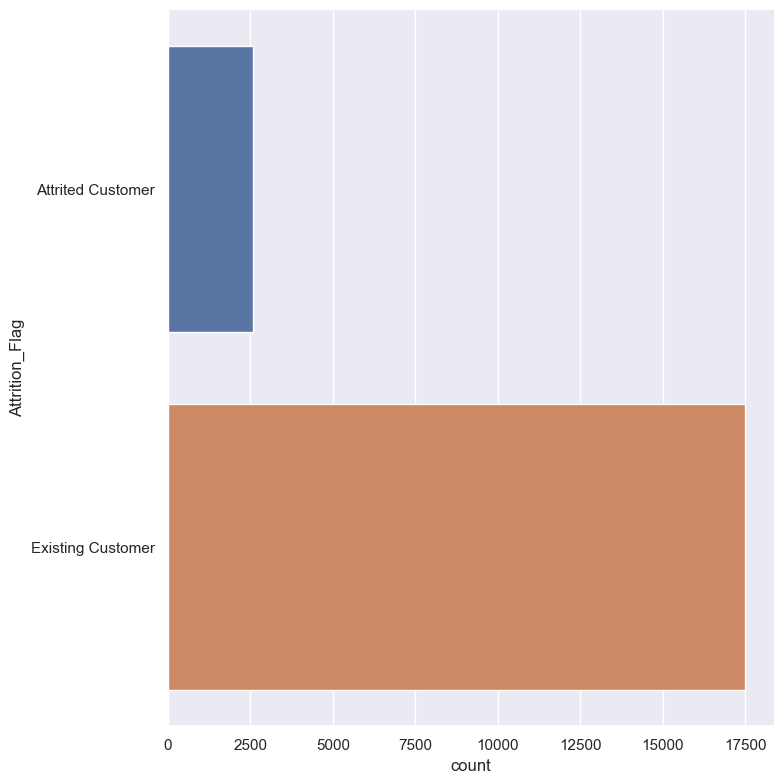

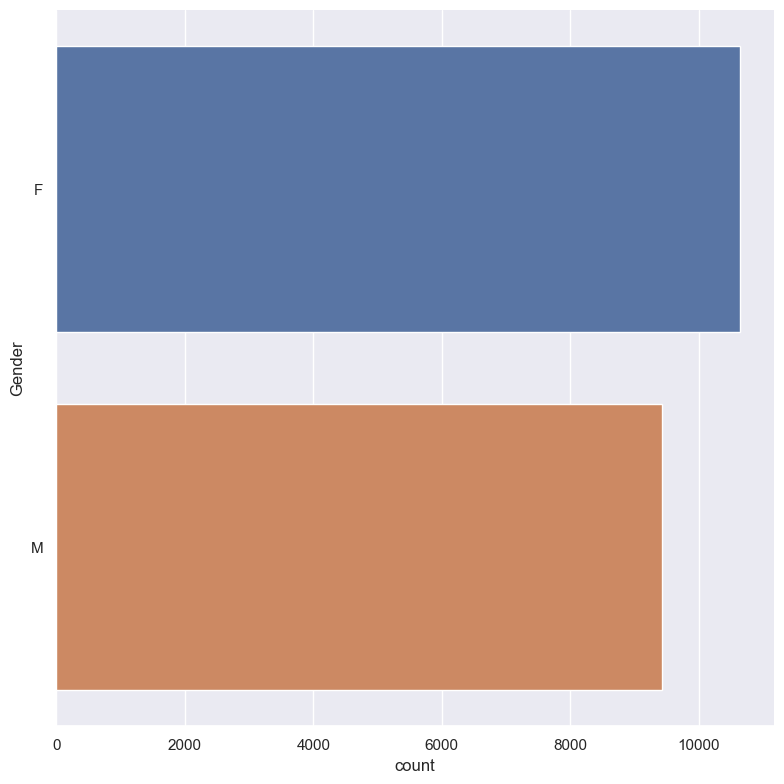

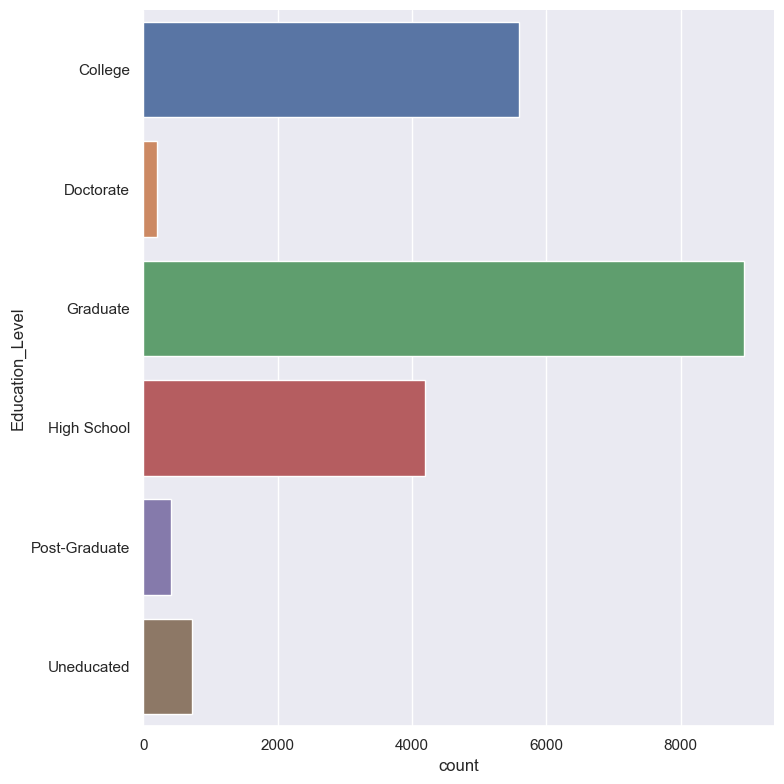

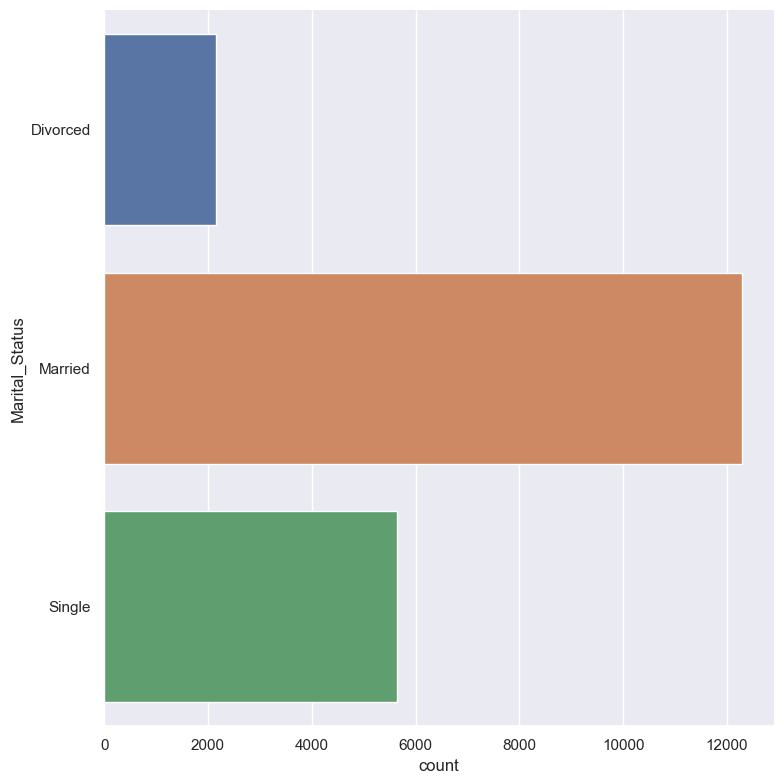

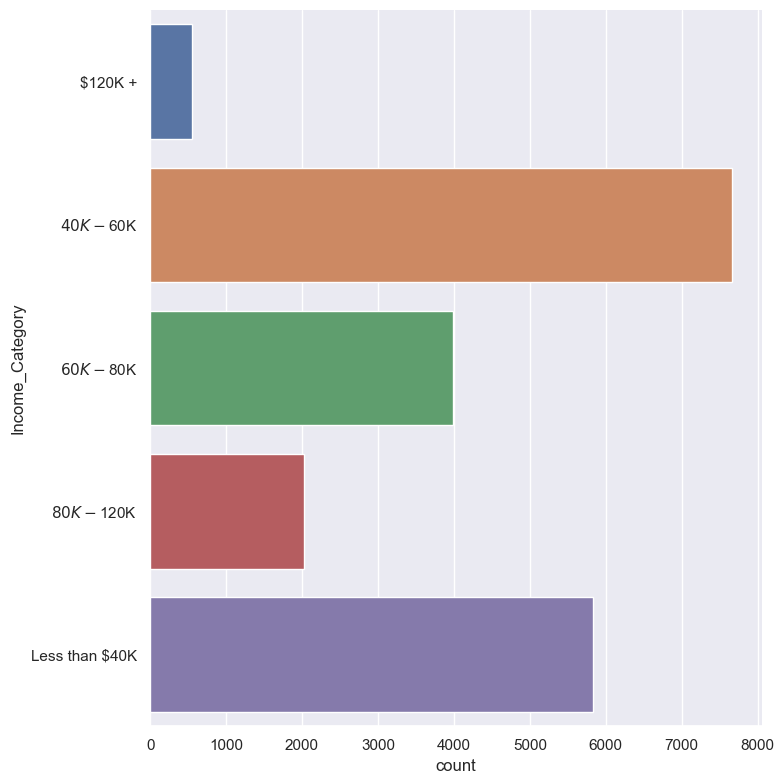

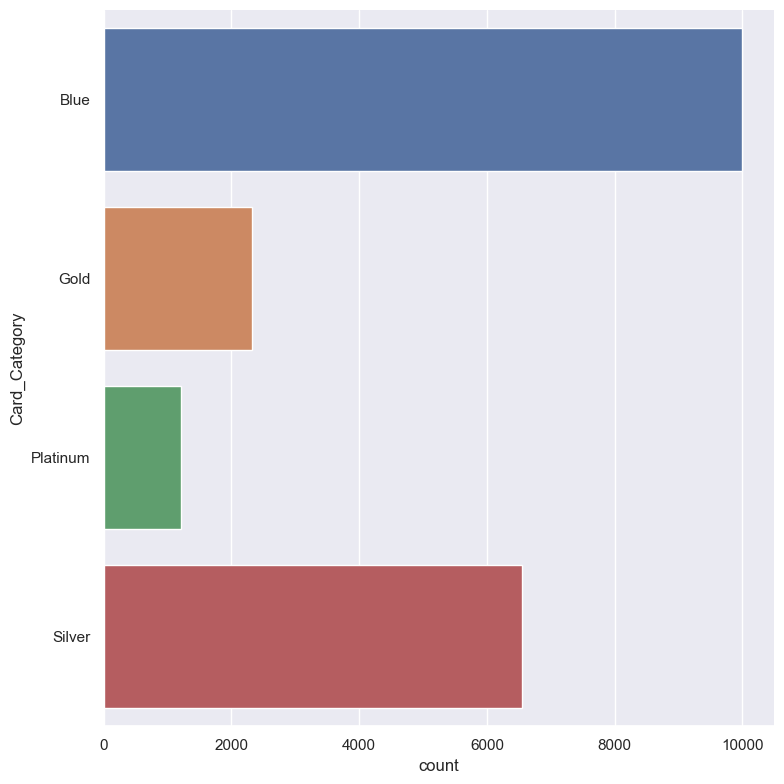

In [13]:
# Draw the distributions of all variables
count = 0
for var in CreditCatData:
    sb.catplot(y=var, data=CreditCatData, kind="count", height=8)
    count += 1

# SPLITTING DATASET INTO TRAINING AND TESTING DATA

In [14]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

x = CreditNumData
y = CreditData['Attrition_Flag']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

# SMOTE - BEFORE AND AFTER OVERSAMPLING

Text(0.5, 1.0, 'After Oversampling')

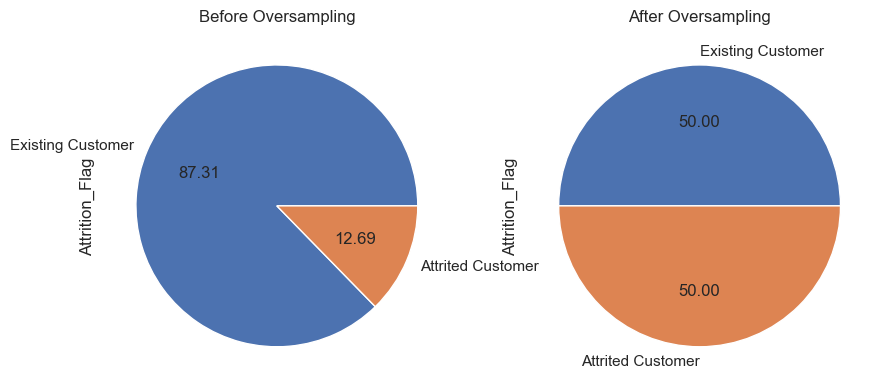

In [15]:
from imblearn.over_sampling import RandomOverSampler

# Before Oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot.pie(autopct='%.2f')
plt.title("Before Oversampling")

# Oversampling
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

# After Oversampling
plt.subplot(1, 2, 2)
y_res.value_counts().plot.pie(autopct='%.2f')
plt.title("After Oversampling")

# MODELLING

## 1) DECISION TREE

### HYPER PARAMETER TUNING FOR DECISION TREES

In [16]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Test max depths from 1 to 30
depths = np.arange(1, 31)
mean_scores = []
for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_scores.append(scores.mean())

# Finding best depth for decision tree
best_depth = depths[np.argmax(mean_scores)]
print("Best Max Depth:", best_depth)

Best Max Depth: 6


### DEPTH 2 - ACCURACY + CLASSIFICATION REPORT + CONFUSION MATRIX

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8961668770344782
Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.73      0.29      0.42      1910
Existing Customer       0.91      0.98      0.94     13143

         accuracy                           0.90     15053
        macro avg       0.82      0.64      0.68     15053
     weighted avg       0.88      0.90      0.88     15053


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8895974491829414
Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.72      0.27      0.39       662
Existing Customer       0.90      0.98      0.94      4356

         accuracy                           0.89      5018
        macro avg       0.81      0.63      0.66      5018
     weighted avg       0.87      0.89      0.87      5018




<Axes: >

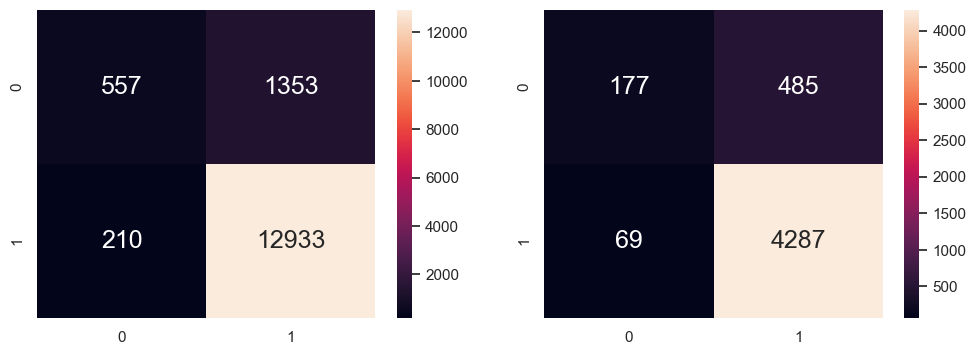

In [17]:
# Import essential models and functions from sklearn
from sklearn.metrics import confusion_matrix, classification_report

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2)  # create the decision tree object
dectree.fit(X_train, y_train)                  # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])


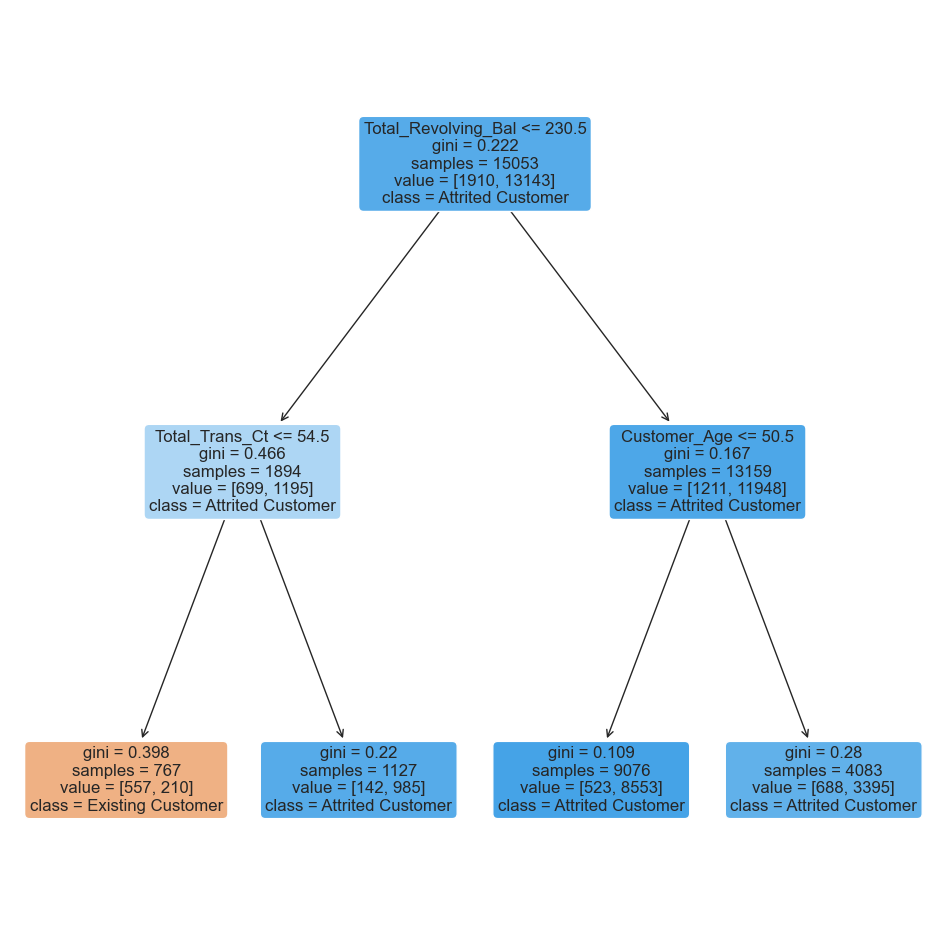

In [18]:
# Import essential models and functions from sklearn
from sklearn.tree import plot_tree

#Plotting decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.to_list(),  # Convert the index to a list
          class_names=["Existing Customer", "Attrited Customer"])
plt.show()

In [19]:
# Calculating and printing feature importance scores for each feature
feature_importance = dectree.feature_importances_

feature_names = list(x.columns)  # Replace with your feature names
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")

Customer_Age: 0.1062
Dependent_count: 0.0000
Months_on_book: 0.0000
Total_Relationship_Count: 0.0000
Months_Inactive_12_mon: 0.0000
Contacts_Count_12_mon: 0.0000
Credit_Limit: 0.0000
Total_Revolving_Bal: 0.3897
Avg_Open_To_Buy: 0.0000
Total_Trans_Ct: 0.5042
Avg_Utilization_Ratio: 0.0000


### BEST DEPTH - CLASSIFICATION ACCURACY + CONFUSION MATRIX

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9122434066299077
Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.81      0.40      0.54      1910
Existing Customer       0.92      0.99      0.95     13143

         accuracy                           0.91     15053
        macro avg       0.87      0.69      0.74     15053
     weighted avg       0.91      0.91      0.90     15053


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.899561578318055
Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.35      0.48       662
Existing Customer       0.91      0.98      0.94      4356

         accuracy                           0.90      5018
        macro avg       0.84      0.66      0.71      5018
     weighted avg       0.89      0.90      0.88      5018




<Axes: >

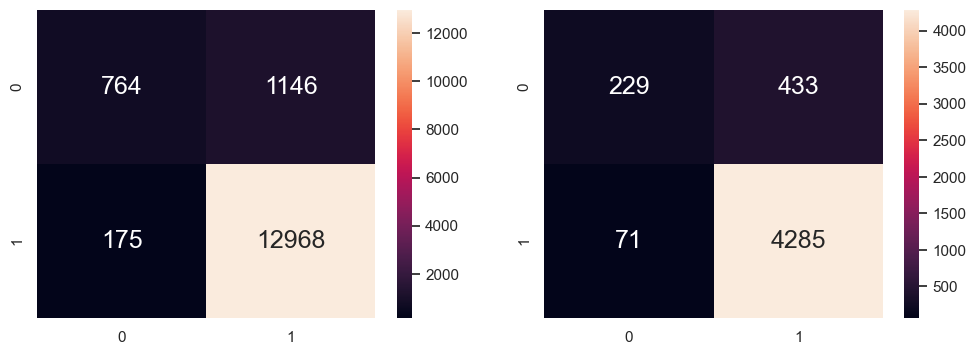

In [20]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_depth)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [21]:
#Plotting the decision tree
f = plt.figure(figsize=(120,120))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.to_list(),  # Convert the index to a list
          class_names=["Existing Customer", "Attrited Customer"])
plt.show()

In [22]:
# Calculating and printing feature importance scores for each feature
feature_importance = dectree.feature_importances_

feature_names = list(x.columns)  # Replace with your feature names
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")
    

Customer_Age: 0.1767
Dependent_count: 0.0023
Months_on_book: 0.0915
Total_Relationship_Count: 0.0485
Months_Inactive_12_mon: 0.0250
Contacts_Count_12_mon: 0.0143
Credit_Limit: 0.0026
Total_Revolving_Bal: 0.2680
Avg_Open_To_Buy: 0.0084
Total_Trans_Ct: 0.3502
Avg_Utilization_Ratio: 0.0125


## 2) RandomForestClassifier

Goodness of Fit of Model 	Train Dataset
Accuracy  	: 1.0
Classification Report (Train Data):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      1910
Existing Customer       1.00      1.00      1.00     13143

         accuracy                           1.00     15053
        macro avg       1.00      1.00      1.00     15053
     weighted avg       1.00      1.00      1.00     15053


Goodness of Fit of Model 	Test Dataset
Accuracy  	: 0.9087285771223595
Classification Report (Test Data):
                   precision    recall  f1-score   support

Attrited Customer       0.84      0.38      0.52       662
Existing Customer       0.91      0.99      0.95      4356

         accuracy                           0.91      5018
        macro avg       0.88      0.68      0.74      5018
     weighted avg       0.90      0.91      0.89      5018




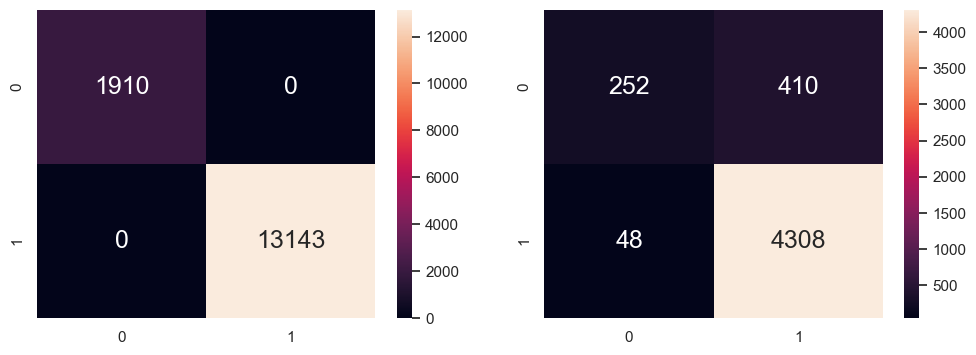

In [27]:


# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Random Forest Classifier using Train Data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict Response corresponding to Train Predictors
y_train_pred = clf.predict(X_train)  # Predictions on the training set

# Predict Response corresponding to Test Predictors
y_test_pred = clf.predict(X_test)  # Predictions on the test set

# Check the Goodness of Fit (on Train and Test Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy  \t:", accuracy_score(y_train, y_train_pred))
print("Classification Report (Train Data):")
print(classification_report(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy  \t:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

plt.show()  # Display the plots


### Plotting RandomForestClassifier

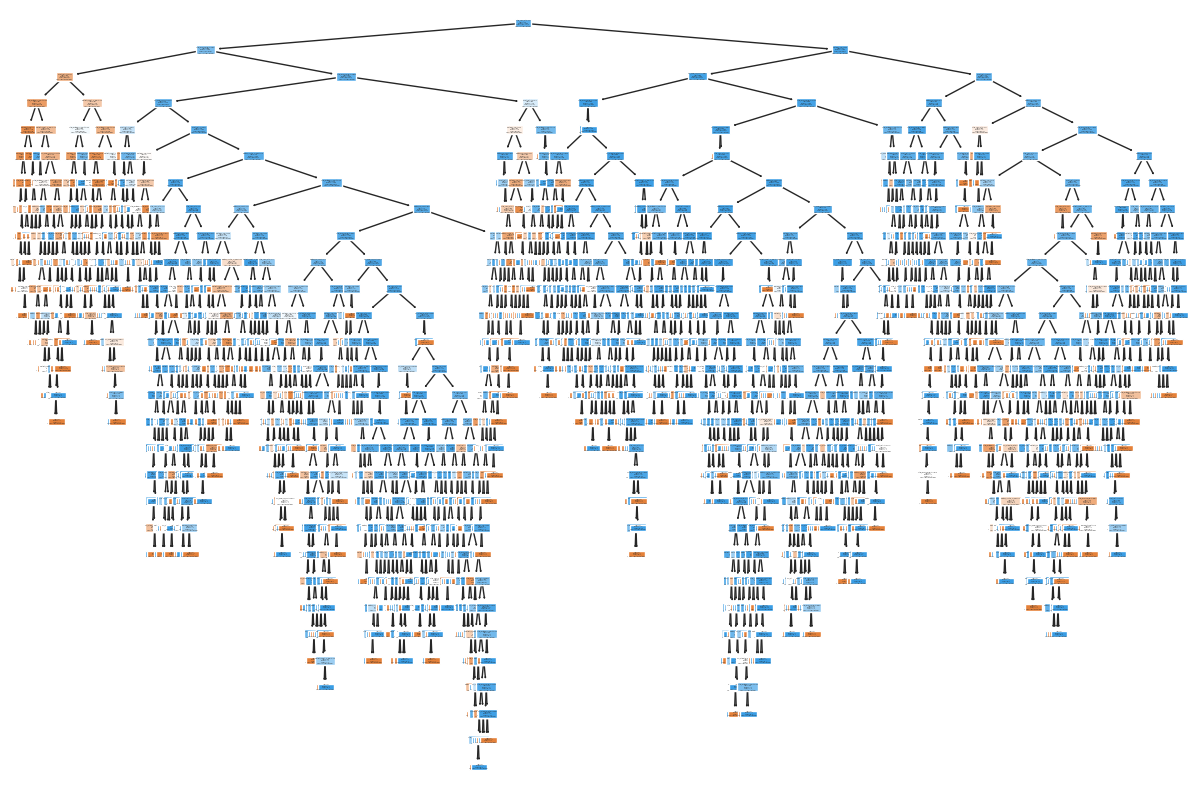

In [24]:
# Import essential models and functions from sklearn
from sklearn import tree

# Visualize a decision tree from the Random Forest
class_names = y.unique().tolist()
plt.figure(figsize=(15, 10))
tree.plot_tree(clf.estimators_[0], filled=True, feature_names=X_train.columns.tolist(), class_names=class_names)
plt.show()

In [25]:
# Calculating and printing feature importance scores for each feature
feature_importance = dectree.feature_importances_

feature_names = list(x.columns)  # Replace with your feature names
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")

Customer_Age: 0.1767
Dependent_count: 0.0023
Months_on_book: 0.0915
Total_Relationship_Count: 0.0485
Months_Inactive_12_mon: 0.0250
Contacts_Count_12_mon: 0.0143
Credit_Limit: 0.0026
Total_Revolving_Bal: 0.2680
Avg_Open_To_Buy: 0.0084
Total_Trans_Ct: 0.3502
Avg_Utilization_Ratio: 0.0125


# Conclusion

Upon comparison among a standard decision tree with a depth of 2, employing the optimal max depth framework, and a random forest classifier, the analysis revealed that the random forest classifier is the most accurate. 

As a result, we were able to precisely identify the variables significantly predicts credit card customers' attrition.

The examination showed that "Total_Trans_Ct" carries the greatest weight in determining whether a customer is classified as "Attrited."